# <center> Sparse wavefront set generation </center>

In this notebook we show how to generate the sparse wavefront set image from the fully sampled wavefront set and a set of subsampled angles

## Load fully sampled wavefront set

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
from skimage.transform import resize
from adler.odl.phantom import random_phantom as random_phantom_jonas

from ellipse.ellipseWF_factory import random_phantom, plot_WF, WFupdate
from shared.shared import create_increasing_dir

In [69]:
size = 256
nClasses = 180

In [70]:
nEllipses = np.random.randint(10,20)
dirBias = np.random.randint(0,180)

In [71]:
phantom, WFpoints, WFclasses,  WFimage = random_phantom(size, nEllipses, dirBias, nClasses)

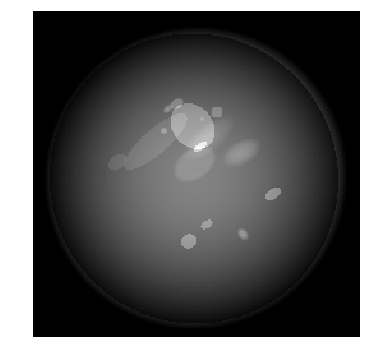

In [72]:
plt.figure(figsize=(6,6))
plt.axis('off')
plt.imshow(phantom, cmap = "gray")

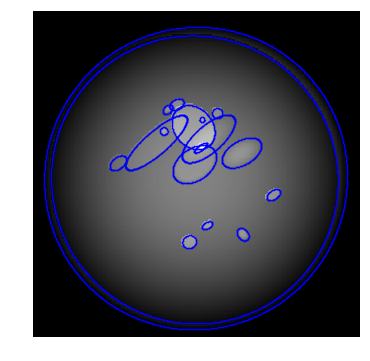

In [73]:
plt.figure(figsize=(6,6))
plt.axis('off')
plt.imshow(phantom, cmap = 'gray')
plt.plot(WFpoints[:,0], WFpoints[:,1], 'bo', markersize = 0.5)

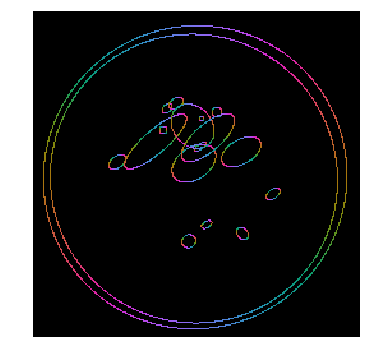

In [74]:
plt.figure(figsize=(6,6))
plt.axis('off')
plot_WF(WFimage)

## Subsampling to sparse angle

In [75]:
# Generating list of angles of the low dose version
num_angles_lowd = 60
angles_lowd = np.array([i for i in range(0,180,int(180/num_angles_lowd))])

In [76]:
# Extracting the wavefront set orientations in the low dose
angles_gt = (np.array(WFclasses).astype(int)[:,0]-1)
angles_gt_lowd = np.array([angle in angles_lowd for angle in angles_gt])

In [77]:
# Generating the new WFpoints and classes
WFpoints_gt_lowd = WFpoints[angles_gt_lowd]
WFclasses_gt_lowd = list(np.array(WFclasses)[angles_gt_lowd])

In [78]:
# Generating the low dose WFimage
WFimage_lowd = np.zeros([size,size])
WFimage_lowd = WFupdate(WFpoints_gt_lowd, WFclasses_gt_lowd, WFimage_lowd)

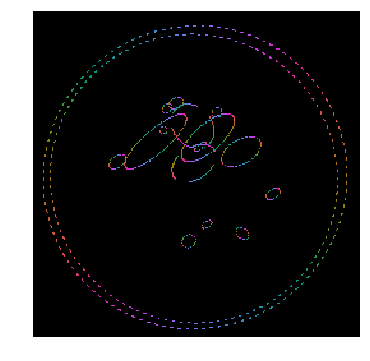

In [79]:
plt.figure(figsize=(6,6))
plt.axis('off')
plot_WF(WFimage_lowd)